In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"F:\Data_Science_Jupyter_Files\Obesity_level_prediction_dataset.csv")

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Exploratory Data Analysis

#### Visualize the distribution of the target variable to understand the class balance.

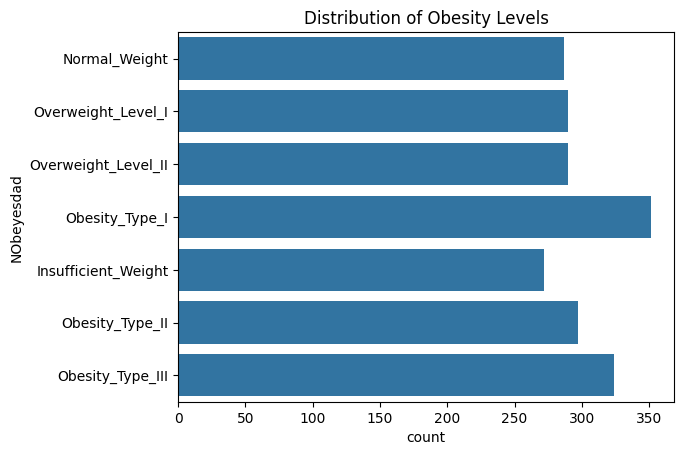

In [5]:
sns.countplot(data=data, y="NObeyesdad")
plt.title("Distribution of Obesity Levels")
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Preprocessing the data

#### Feature scaling

In [9]:
# Scale the numerical features to standardize their ranges for better model performance.

# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=["float64"]).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

### One-hot encoding

#### Convert categorical variables into numerical format using one-hot encoding.

In [10]:
categorical_columns = scaled_data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns.remove("NObeyesdad")

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

#### Encode the target variable

In [11]:
prepped_data["NObeyesdad"] = prepped_data["NObeyesdad"].astype("category").cat.codes
prepped_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Separate the input and target data

In [12]:
# Preparing final dataset
X = prepped_data.drop("NObeyesdad", axis=1)
y = prepped_data["NObeyesdad"]

### Model training and evaluation

In [13]:
#Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Train a logistic regression model using the One-vs-All strategy and evaluate its performance.

In [15]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class="ovr", max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [18]:
# We can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.

# Predictions
y_pred_ova = model_ova.predict(X_test)

In [20]:
# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuray: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuray: 73.05%


#### Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.

In [21]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [22]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 84.87%


#### Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model.

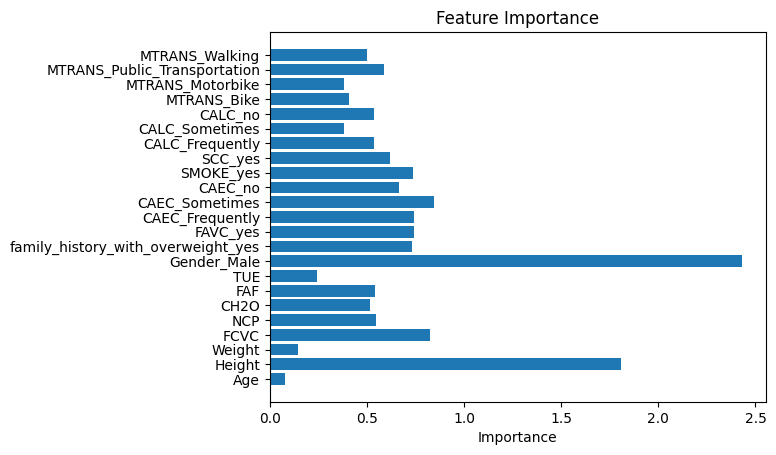

In [23]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

#### Plot a bar chart of feature importance using the coefficients from the One vs One logistic regression model.

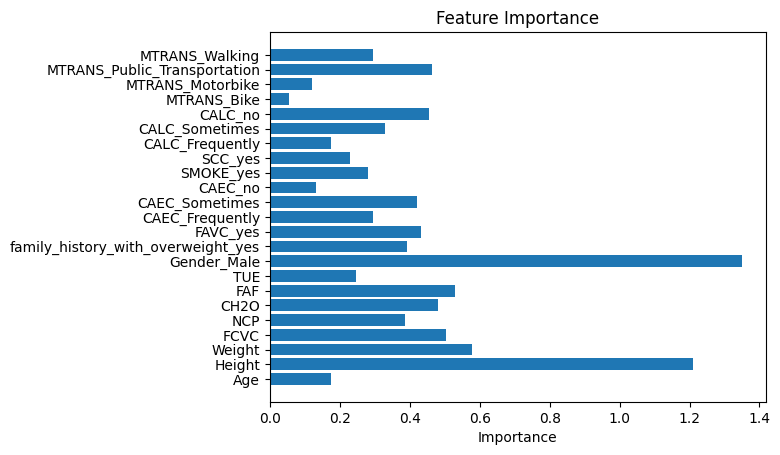

In [31]:
coefs = np.vstack([est.coef_ for est in model_ovo.estimators_])
feature_importance_ = np.mean(np.abs(coefs), axis=0)
plt.barh(X.columns,feature_importance_)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [32]:
# Experiment with different test sizes in the train_test_split method (e.g., 0.1, 0.3) and observe the impact on model performance.

for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))

Test Size: 0.1
Accuracy: 0.7264150943396226
Test Size: 0.3
Accuracy: 0.7287066246056783


In [33]:
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ovo.fit(X_train, y_train)
    y_pred_ovo = model_ovo.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accurace:", accuracy_score(y_test, y_pred_ovo))

Test Size: 0.1
Accurace: 0.7971698113207547
Test Size: 0.3
Accurace: 0.8391167192429022


In [34]:
# A function obesity_risk_pipeline to automate the entire pipeline:

def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))